In [ ]:
# -*- coding: utf-8 -*-

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 4

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 4


Importation des librairies nécessaires au projet

In [ ]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import functions #fonctions OCR pour les répresentations de l'ACP
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

from sklearn.metrics.cluster import adjusted_rand_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_maintenance = pad.read_csv('data_projet4_data_maintenance.csv', sep='\t')

# Périodicité de la maintenance

In [ ]:
df_maintenance = df_maintenance.rename(columns={"Time_after_last_purchase_days_x": "Time_after_last_purchase_days", "Time_after_last_purchase_days_y": "Time_after_last_purchase_days_norm"})

In [ ]:
Period_all = df_maintenance.drop(['Time_after_last_purchase_days'], axis=1)
Period_1 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *1]
Period_1 = Period_1.drop(['Time_after_last_purchase_days'], axis=1)
Period_2 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *2]
Period_2 = Period_2.drop(['Time_after_last_purchase_days'], axis=1)
Period_3 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *3]
Period_3 = Period_3.drop(['Time_after_last_purchase_days'], axis=1)
Period_4 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *4]
Period_4 = Period_4.drop(['Time_after_last_purchase_days'], axis=1)
Period_5 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *5]
Period_5 = Period_5.drop(['Time_after_last_purchase_days'], axis=1)
Period_6 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *6]
Period_6 = Period_6.drop(['Time_after_last_purchase_days'], axis=1)
Period_7 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *7]
Period_7 = Period_7.drop(['Time_after_last_purchase_days'], axis=1)
Period_8 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *7.5]
Period_8 = Period_8.drop(['Time_after_last_purchase_days'], axis=1)
Period_9 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *8]
Period_9 = Period_9.drop(['Time_after_last_purchase_days'], axis=1)
Period_10 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *8.25]
Period_10 = Period_10.drop(['Time_after_last_purchase_days'], axis=1)
Period_11 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *9]
Period_11 = Period_11.drop(['Time_after_last_purchase_days'], axis=1)
Period_12 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *10]
Period_12 = Period_12.drop(['Time_after_last_purchase_days'], axis=1)
Period_13 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *11]
Period_13 = Period_13.drop(['Time_after_last_purchase_days'], axis=1)
Period_14 = df_maintenance[df_maintenance["Time_after_last_purchase_days"] < df_maintenance["Time_after_last_purchase_days"].max() - 60 *11.5]
Period_14 = Period_14.drop(['Time_after_last_purchase_days'], axis=1)

delai_period = [0,1,2,3,4,5,6,7,7.5,8,8.25,9,10,11,11.5]


In [ ]:
list_of_period = [Period_1, Period_2, Period_3,Period_4,Period_5,Period_6,Period_7,Period_8,Period_9,Period_10,Period_11,Period_12,Period_13,Period_14]

In [ ]:
kmeans = KMeans(n_clusters=7, verbose=1, random_state=7).fit(Period_all)
predicted_labels_all = kmeans.predict(Period_all)

Initialization complete
Iteration 0, inertia 123083.70585768661
Iteration 1, inertia 87119.78969588823
Iteration 2, inertia 84634.8365711363
Iteration 3, inertia 84100.39507891114
Iteration 4, inertia 83870.20997063046
Iteration 5, inertia 83747.50660728727
Iteration 6, inertia 83691.42330330826
Iteration 7, inertia 83681.96475128179
Iteration 8, inertia 83676.83807968909
Iteration 9, inertia 83673.94608646471
Iteration 10, inertia 83656.36785017126
Iteration 11, inertia 83653.52308329463
Iteration 12, inertia 83653.0474356334
Iteration 13, inertia 83652.70503692458
Iteration 14, inertia 83652.37416008422
Iteration 15, inertia 83652.28880092577
Converged at iteration 15: center shift 8.320588157889892e-07 within tolerance 3.6965788586142197e-05.
Initialization complete
Iteration 0, inertia 125457.82479376449
Iteration 1, inertia 81512.04726826726
Iteration 2, inertia 80431.38476502018
Iteration 3, inertia 80125.32825662864
Iteration 4, inertia 79722.69425448305
Iteration 5, inertia 796

In [ ]:
predicted_labels = []
for i in range(len(list_of_period)):
    kmeans = KMeans(n_clusters=7, verbose=1, random_state=7).fit(list_of_period[i])
    predicted_labels.append(kmeans.predict(Period_all))

J'évalue le ARI score en fonction des périodes prises en compte afin de savoir à partir de quel moment ma prédiction de classification est mauvaise (en dessous de 0.8)

In [ ]:
ARI_score = [1]
for elm in predicted_labels:
    print("Score ARI = " + str(adjusted_rand_score(predicted_labels_all, elm)))
    ARI_score.append(adjusted_rand_score(predicted_labels_all, elm))

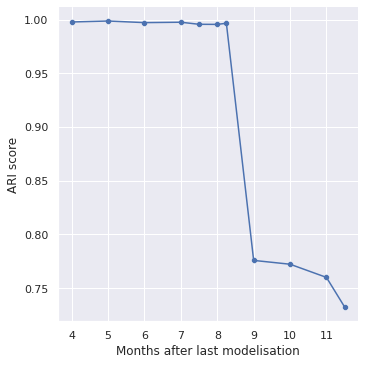

In [ ]:
sns.set_theme()
ax = sns.relplot(x=delai_period[4:], y=ARI_score[4:], kind='line')
ax = sns.scatterplot(x=delai_period[4:], y=ARI_score[4:])
plt.set(xlim=(4,12), ylim=(0.7, 1.1))
ax.set_ylabel('ARI score')
ax.set_xlabel('Months after last modelisation')
fig = ax.get_figure()
fig.savefig("ARI score maintenance", dpi=400)

Une maintenance tous les 8 mois semble optimale, en effet au delà le score ARI diminue drastiquement